<center><h3>Abstract</h3></center><br>
This report will discuss about Study of fitting of data using models and to Study the effect of noise on the fitting process,in particular we analyse the Bessel function $J_{v}(x)$ and use Least Squares Fitting to predict the type of Bessel function that is to estimate '$\nu$' with approximated model for large $x$ in Eq(2) using accurate values of $J_{v}(x)$ (data to fit) calculated using inbuilt function in python.

# Introduction
* The Bessel functions of the first kind $J_{v}(x)$ are defined as the solutions to the Bessel differential equation

\begin{equation}
x^{2} \frac{d^2 y}{dx^2} + x\frac{dy}{dx}+(x^2-\nu^2)y = 0
   \end{equation}
* Here we use model given in Eq(2) for large $x$ as a target model to estimate the parameters such as $\nu$  for the predicted model which is obtained by fitting the data using Least Squares.
\begin{equation}
    J_{v}(x) \approx \sqrt\frac{2}{\pi x}\cos(x-\frac{\nu\pi}{2}-\frac{\pi}{4})
    \end{equation}

# Python Code : 

In [3]:
# load libraries and set plot parameters
from pylab import *
from scipy.integrate import quad
%matplotlib inline
import scipy.special as sp

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 6
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.numpoints'] = 2
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.shadow'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

# Question 1
## Part A
* Generate a vector of 41 values from 0 to 20 and obtain a vector of $J_{1}(x)$ values.
* To plot $J_{1}(x)$ using inbuilt function 'jv'.

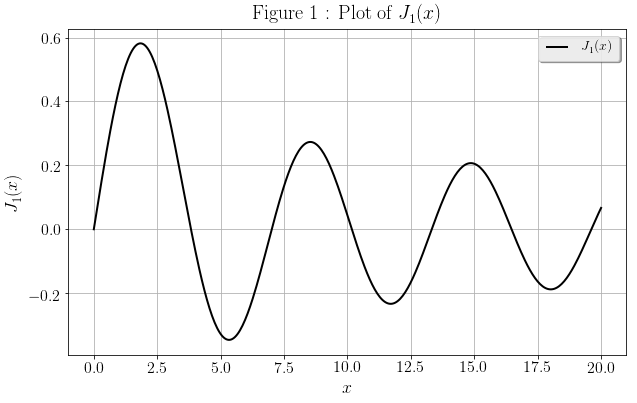

In [4]:
x = linspace(0,20,41)
J1 = sp.jv(1,x)

#Plotting original function for J1(x)
fig1 = figure()
ax1 = fig1.add_subplot(111)
#increasing the no_of points to get smooth graph
ax1.plot(linspace(0,20,400),sp.jv(1,linspace(0,20,400)),'k',label="$J_{1}(x)$")
ax1.legend()
title("Figure 1 : Plot of $J_{1}(x)$")
xlabel("$x$")
ylabel("$J_{1}(x)$")
grid()
savefig("Figure1.jpg")

## Part B
* For different $x_{0}$ = 0.5,1,....18. extract the subvectors of $x$ and $J_{1}(x)$ that correspond to $x$ $\geq$ $x_{0}$. 
* For each $x_{0}$, construct the matrix corresponding to Eq(3)  and obtain the best fit A and B. 
* Obtain the $\phi$ corresponding to the Eq(3) and using Eq(5) calculate the $\nu$ from Eq(6)
* To Obtain best $x_{0}$ after which the model fits perfectly and hence predict the $\nu$ for each $x_{0}$ for models used in Eq(3). This is to verify that predicted model fits well for large $x$ only
 
* We use Model A as..

   \begin{equation}
   A\cos(x_{i})+B\sin(x_{i}) \approx J_{1}(x_{i})
   \end{equation}
   
   \begin{equation}
   \phi = \cos^{-1}(\frac{A}{\sqrt{A^2+B^2}})
   \end{equation}
   
   \begin{equation}
   \\ \phi = \frac{\nu\pi}{2}+\frac{\pi}{4}
   \end{equation}
   
   \begin{equation}
   \\ \nu = \frac{2}{\pi}(\phi - \frac{\pi}{4})
   \end{equation}

In [5]:
# function to calculate model A and model B
def modelA(x):
    return (cos(x),sin(x))

def modelB(x):
    return((cos(x)/sqrt(x)),((sin(x)/sqrt(x))))

In [6]:
#function to create Matrix for finding the Best fit using lstsq
# with no_of rows, columns by default 2 and vector x as arguments
def createAmatrix(nrow,x,model):
    A = zeros((nrow,2)) # allocate space for A
    A[:,0],A[:,1] = model(x)
    return A

In [7]:
# Function to extract the indexes of x greater than each value present 
# in x0 vector, so basically indexes is 2-D List.
# Arguments: Vector x and Vector x0
def extract_subvectors(x,x0):
    indexes = [where(x>k) for k in x0]
    return indexes

In [8]:
# Function to compute function back from Matrix and Coefficients A and B
def computeFunction(M,c):
    return M.dot(c)

In [9]:
# Function to calculate the 'nu' for specified model and epsilon value
# Takes arguments : vector x,x0 and eps : amount of noise added to output
# model: It is a function which returns either model A or B
def calcnu(x,x0,eps,model):
    indexes = extract_subvectors(x,x0)
    #Data to fit for given x
    J1 = sp.jv(1,x)
    M = []         #Matrix is 3-D list stores Matrix for each x0
    c = []         #List that stores Model Parameter Vector for each x0
    v = []         #Vector of 'nu' values for each x0
    for i,index in enumerate(indexes):
        x_sub = x[index]
        J1_sub = J1[index]+eps*randn(len(x_sub))
        M.append(createAmatrix(len(x_sub),x_sub,model))
        c.append(lstsq(M[i],J1_sub)[0])
        #calculating phi from Eq(5)
        phi = arccos(c[i][0]/sqrt(pow(c[i][0],2)+pow(c[i][1],2)))
        #calculating 'nu' from Eq(6)
        v.append((2/pi)*((-pi/4)+phi))
    return c,v,M

In [8]:
# Function to calculate best x0
# i.e x values after which model fits well
def find_Best_x0(array,value):
    idx = min(range(len(array)), key=lambda i: abs(array[i]-value))
    return idx

In [9]:
x0 = arange(0.5,18.5,0.5)
# Storing model A params 'A' and 'B' for each x0 in Eq(3)
coeff_ab_A = (calcnu(x,x0,0,modelA)[0])
# Storing 'nu' values for each x0 for model A
v_modelA = (calcnu(x,x0,0,modelA)[1])
# Storing model A matrix for each x0
M_modelA = (calcnu(x,x0,0,modelA)[2])

# Find best x0 which has 'nu' close to 1 for model A
best_index_A = find_Best_x0(v_modelA,1)
print(("Best x0 : %g , Corresponding 'Nu' value: %g") % 
      (x0[best_index_A],v_modelA[best_index_A]))

Best x0 : 18 , Corresponding 'Nu' value: 0.990268


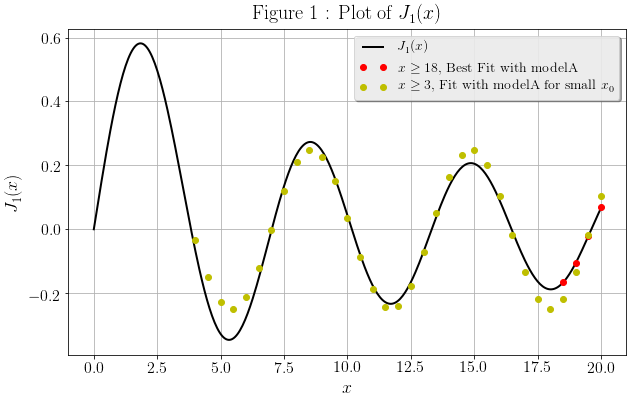

In [10]:
#Plotting Best fit obtained using model A for J1(x)
# x0 = 18 and x0=6
xsub1 = x[where(x>x0[best_index_A])]
xsub2 = x[where(x>x0[6])]  # for x0 = 3
f_bestFitA = computeFunction(M_modelA[best_index_A],coeff_ab_A[best_index_A])
f_bestFitA2 = computeFunction(M_modelA[6],coeff_ab_A[6])

ax1.plot(xsub1,f_bestFitA,'ro',label="$x \geq 18$, Best Fit with modelA")
ax1.plot(xsub2,f_bestFitA2,'yo',label="$x \geq 3$, Fit with modelA for small $x_0$")

ax1.legend()
fig1

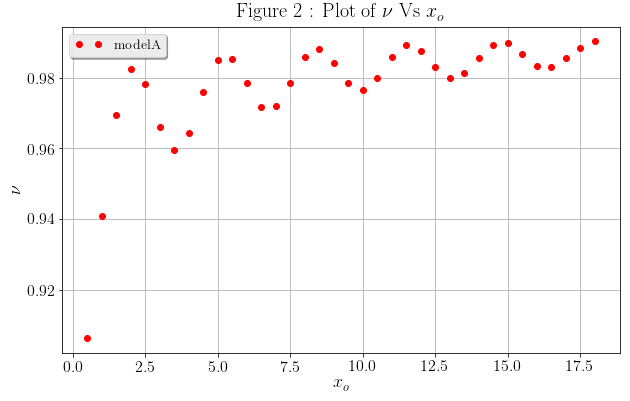

In [11]:
#Plotting the 'nu' estimated for each x0 for model A
fig2 = figure()
ax2 = fig2.add_subplot(111)
ax2.plot(x0,v_modelA,'ro',label="modelA")
ax2.legend()
title(r"Figure 2 : Plot of $\nu$ Vs $x_{o}$")
xlabel("$x_{o}$")
ylabel(r"$\nu$")
grid()
savefig("Figure2.jpg")

### Results and Discussion : 
* We observe Figure 1 that there is a significant deviation in Fitted model using Model A in Eq(3) for small values of $x_0$ in this case 3.
* Whereas for large $x_0$ such as 18 we see that it fits perfectly with the original function because our Model taken is valid or fits perfectly for large $x$ only. So it is evident from our observation.
* We observe Figure 2 that the $\nu$ estimated for Model A is close to 1 but varies a lot with x0 at small values compared to large values since model A we predicted is approximated for large x and it does not take into account of division by $\sqrt{x}$ in the correct model of $J_{v}(x)$ given in Eq(2) for large $x$.
* We see that best $x_{0}$ obtained is the largest value i.e 18 because the model we used fits well for large values of $x$ so our prediction is correct as we got best $x_0$ as 18.

## Part C
* We use different model called Model B to fit the data now given by ...

\begin{equation}
   A\frac{\cos(x_{i})}{\sqrt{x_i}}+B\frac{\sin(x_{i})}{\sqrt{x_i}} \approx J_{1}(x_{i})
   \end{equation}
* And to compare the fits obtained using Model A and Model B

In [12]:
coeff_ab_B = (calcnu(x,x0,0,modelB)[0])
v_modelB = (calcnu(x,x0,0,modelB)[1])
M_modelB = (calcnu(x,x0,0,modelB)[2])

best_index_B = find_Best_x0(v_modelB,1)
print(("Best x0 : %g , Corresponding 'Nu' value: %g")%
      (x0[best_index_B],v_modelB[best_index_B]))

Best x0 : 18 , Corresponding 'Nu' value: 0.987848


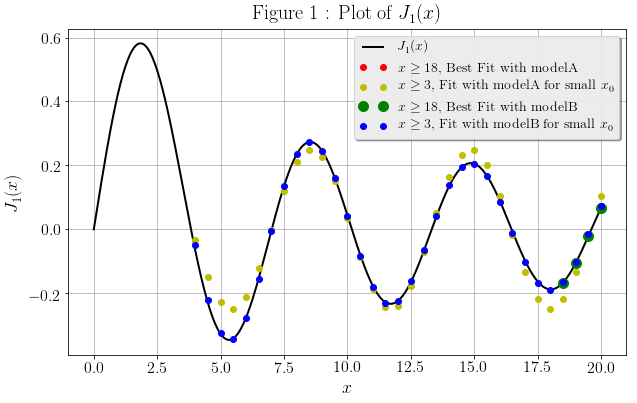

In [13]:
#Plotting Best fit obtained using model B for J1(x)
# x0 = 18 and x0=6
xsub21 = x[where(x>x0[best_index_B])]
xsub22 = x[where(x>x0[6])]  # for x0 = 3

f_bestFitB = computeFunction(M_modelB[best_index_B],coeff_ab_B[best_index_B])
f_bestFitB2 = computeFunction(M_modelB[6],coeff_ab_B[6])

ax1.plot(xsub21,f_bestFitB,'go',markersize=10,label="$x \geq 18$, Best Fit with modelB")
ax1.plot(xsub22,f_bestFitB2,'bo',label="$x \geq 3$, Fit with modelB for small $x_0$")

ax1.legend()
fig1

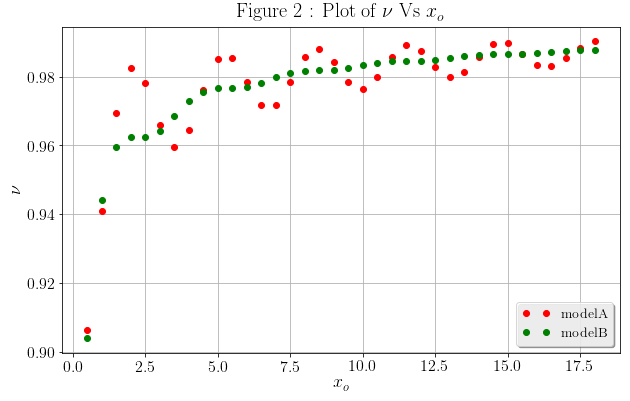

In [14]:
#Plotting the 'nu' estimated for each x0 for model B
ax2.plot(x0,v_modelB,'go',label = "modelB")
ax2.legend()
fig2

### Results and Discussion : 
* As we observe Figure 1 that for Model B for lesser values of $x_0$ itself it fits the original function well compared to model A.
* Also in Figure 2 for Model B the $\nu$ doesn't oscillate as much as Model A for particular $x_0$ and its closer to 1
* Because in Model A we neglected the division by $\sqrt{x}$ in the correct model of $J_{v}(x)$ given in Eq(2) for large $x$. whereas included in Model B in Eq(7)
* So Model B fits more closer to true model of $J_v(x)$ for large $x$ given in Eq(2) than Model A.Hence the difference.

## Part D & E
* To define $\nu$ =calcnu(x,x0,’r’,eps,model) which is already defined above in the code in part 2.
* To add noise using $\epsilon*randn()$ where $\epsilon$ is the percentage of the noise.
* Observe the effect on the fit and Plot the fit for $\epsilon = 0.01$

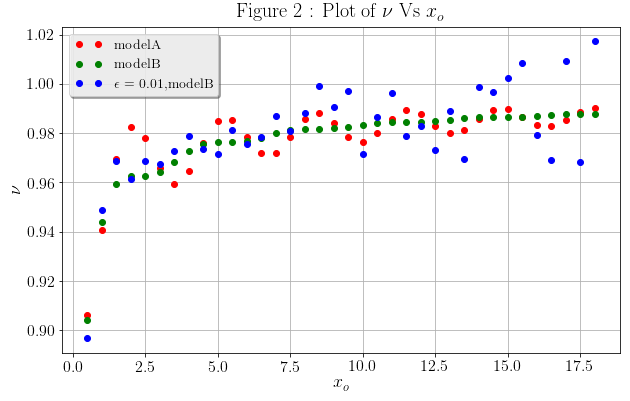

In [15]:
# 'nu' for model B when 1 % noise is added to output for each x0
v_modelB_noise = calcnu(x,x0,0.01,modelB)[1]

ax2.plot(x0,v_modelB_noise,'bo',label="$\epsilon$ = 0.01,modelB")
ax2.legend()
fig2

###  Results and Discussion : 
* As we observe the Figure 2 for Model B with $1\%$ noise added to the data,the fit oscillates more at large $x_0$ compared to small values of $x_0$ and it varies a lot compared to Model A and B without noise.
* Because the no of points (sample size) used for fitting using Least Squares is less in this case i.e
 41,so no of values more than x0 will be less since range of x is fixed,so when noise is added , due
 to less data there will be more variations whereas if more data is used for fitting then Average
 Noise ≈ 0 which is proved using Maximum Likelihood and CLT theorems in Probability,but
 intuitively we see that when more data is there effect of noise is less since noise follows a Gaussian
 distribution its average value is zero so that model fits approximately well. So because of less no
 of points the effect of noise is higher at large x0.
* So effect of noise on the data decreases the quality of the fit and at large $x_0$ it varies more from correct value 1


## Part F
* Varying the number of measurements (keeping the range of x the same) with noise amount of $\epsilon = 0.01$
    for Model A and B ,plotting it
* To analyse the Plot and to discuss the effect of varying no of measurements on both models.

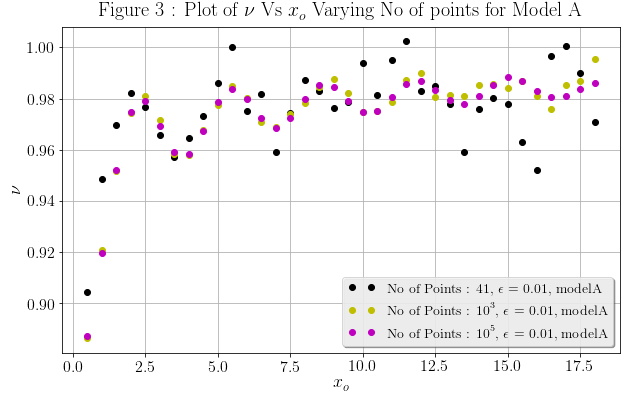

In [16]:
#Different no of points with same x range
x2 = linspace(0,20,pow(10,3))
x3 = linspace(0,20,pow(10,5))

#Storing the 'nu' for each x0 for different stepsizes
v_modelA_noise = (calcnu(x,x0,0.01,modelA)[1])
v_modelA21 = (calcnu(x2,x0,0.01,modelA)[1])
v_modelA31 = (calcnu(x3,x0,0.01,modelA)[1])

fig3 = figure()
ax3 = fig3.add_subplot(111)
ax3.plot(x0,v_modelA_noise,'ko',label="No of Points : $41$, $\epsilon$ = 0.01, modelA")
ax3.plot(x0,v_modelA21,'yo',label="No of Points : $10^{3}$, $\epsilon$ = 0.01, modelA")
ax3.plot(x0,v_modelA31,'mo',label="No of Points : $10^{5}$, $\epsilon$ = 0.01, modelA")
ax3.legend()
title(r"Figure 3 : Plot of $\nu$ Vs $x_{o}$ Varying No of points for Model A")
xlabel("$x_{o}$")
ylabel(r"$\nu$")
grid()
savefig("Figure3.jpg")
show()

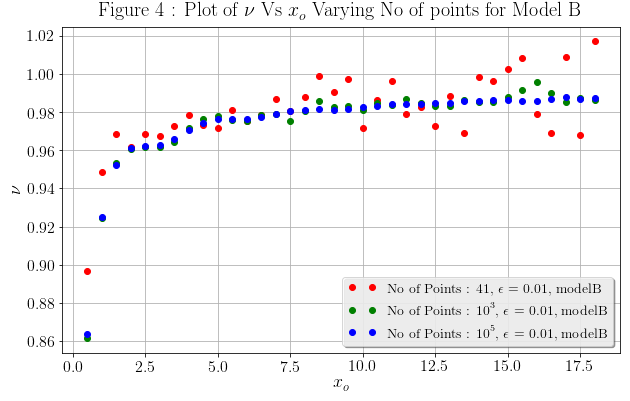

In [17]:
v_modelB21 = (calcnu(x2,x0,0.01,modelB)[1])
v_modelB31 = (calcnu(x3,x0,0.01,modelB)[1])

fig4 = figure()
ax4 = fig4.add_subplot(111)
title(r"Figure 4 : Plot of $\nu$ Vs $x_{o}$ Varying No of points for Model B")
xlabel("$x_{o}$")
ylabel(r"$\nu$")
grid()
savefig("Figure4.jpg")
    
ax4.plot(x0,v_modelB_noise,'ro',label="No of Points : $41$, $\epsilon$ = 0.01, modelB")
ax4.plot(x0,v_modelB21,'go',label="No of Points : $10^{3}$, $\epsilon$ = 0.01, modelB")
ax4.plot(x0,v_modelB31,'bo',label="No of Points : $10^{5}$, $\epsilon$ = 0.01, modelB")

ax4.legend()
show()

###  Results and Discussion : 
* As we observe in Figure 3 that when no of points increased from 41 to $10^3$ and higher the effect of noise fading out, Since there will be more no of points greater than $x_0$ compared to former case,the effect of noise reduces.
* Hence we see that there are more variations for sample size of 41 compared to $10^3$ and $10^5$
* Similarly in Figure 4 for model B,the effect of noise fades out as we increase the no of points to higher values from 41.
* So to conclude that's why we use very large dataset to fit models because at large $x_0$ there will still be large no of points greater than $x_0$ which is used to fit the model, so the effect of noise is less which is proved using Probability theorems like Maximum Likelihood function and randomness of noise with large no of points averages out to zero , so we get good fit for large no of points!

## Part G
* Discuss the effect of model accuracy, number of measurements, and the effect of noise on the quality of Fit.

In [18]:
eps1 = 0.01
eps2 = 1
eps3 = 0.0001

no_points1 = 41

x = linspace(0,20,no_points1)

v_modelA1 = (calcnu(x,x0,eps1,modelA)[1])
v_modelA2 = (calcnu(x,x0,eps2,modelA)[1])
v_modelA3 = (calcnu(x,x0,eps3,modelA)[1])

v_modelB1 = (calcnu(x,x0,eps1,modelB)[1])
v_modelB2 = (calcnu(x,x0,eps2,modelB)[1])
v_modelB3 = (calcnu(x,x0,eps3,modelB)[1])

#### Model Accuracy :

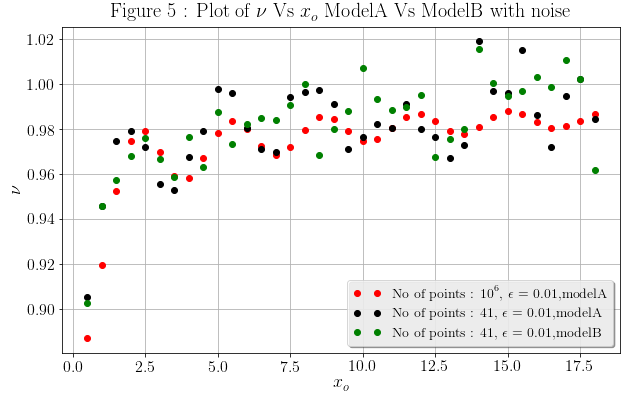

In [19]:
#Plotting fit for 'v' using Model A and Model B with noise
v_modelA4 = (calcnu(linspace(0,20,pow(10,6)),x0,eps1,modelA)[1])

fig5 = figure()
ax5 = fig5.add_subplot(111)
ax5.plot(x0,v_modelA4
         ,'ro',label="No of points : $10^{6}$, $\epsilon$ = 0.01,modelA")
ax5.plot(x0,v_modelA1,'ko',label="No of points : 41, $\epsilon$ = 0.01,modelA")
ax5.plot(x0,v_modelB1,'go',label="No of points : 41, $\epsilon$ = 0.01,modelB")
ax5.legend()
title(r"Figure 5 : Plot of $\nu$ Vs $x_{o}$ ModelA Vs ModelB with noise")
xlabel("$x_{o}$")
ylabel(r"$\nu$")
grid()
savefig("Figure5.jpg")

#### Results and Discussion : 
* As we observe Figure 5,fit using Model B with datasize of 41 is more accurate than model A with same no of points
    because our Correct model for $J_v(x)$ for large values of $x$ is given in Eq(2).
* If we observe that Model B is similar to true model whereas Model A does not take into account of division by $\sqrt{x}$ as in the correct model of $J_{v}(x)$ given in Eq(2) for large $x$.
* So Model B is accurate than Model A
* But as we see the same fit using Model A with a large datasize of $10^6$ is less oscillatory compared to Model B
 this is because of large no of points taken so that noise effect is less.
* So to conclude Model B is accurate than Model A when both are fitted with same no of points otherwise its difficult to compare them!

#### Effect of Noise on the quality of the fit for Model A :

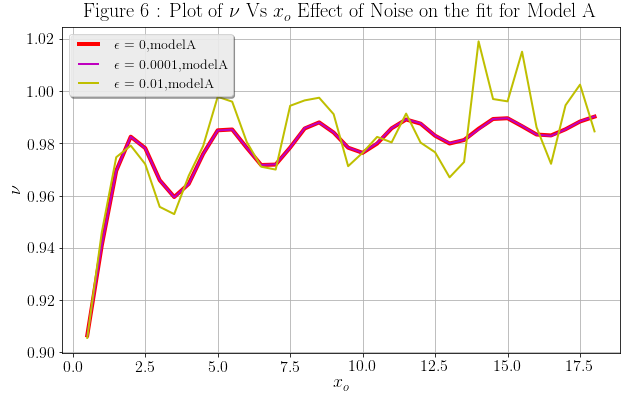

In [20]:
#Plotting fit for 'v' by varying noise level
fig6 = figure()
ax6 = fig6.add_subplot(111)

ax6.plot(x0,v_modelA,'r',linewidth = 4,label="$\epsilon$ = 0,modelA")
ax6.plot(x0,v_modelA3,'m',label="$\epsilon$ = 0.0001,modelA")
ax6.plot(x0,v_modelA1,'y',label="$\epsilon$ = 0.01,modelA")

ax6.legend()

title(r"Figure 6 : Plot of $\nu$ Vs $x_{o}$ Effect of Noise on the fit for Model A")
xlabel("$x_{o}$")
ylabel(r"$\nu$")
grid()
savefig("Figure6.jpg")

#### Effect of  Noise on the quality of the fit for Model B:

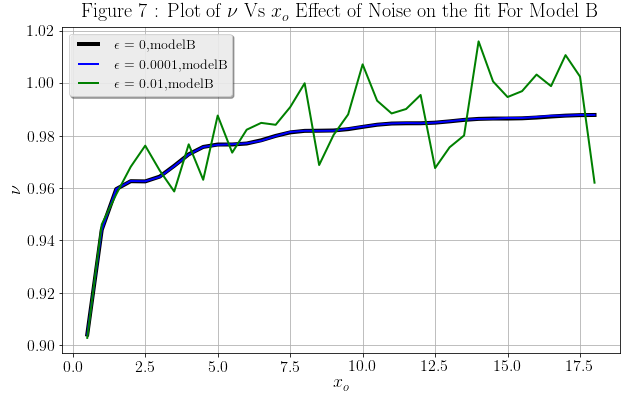

In [21]:
fig7 = figure()
ax7 = fig7.add_subplot(111)

ax7.plot(x0,v_modelB,'k',linewidth = 4,label="$\epsilon$ = 0,modelB")
ax7.plot(x0,v_modelB3,'b',label="$\epsilon$ = 0.0001,modelB")
ax7.plot(x0,v_modelB1,'g',label="$\epsilon$ = 0.01,modelB")

ax7.legend()

title(r"Figure 7 : Plot of $\nu$ Vs $x_{o}$ Effect of Noise on the fit For Model B")
xlabel("$x_{o}$")
ylabel(r"$\nu$")
grid()
savefig("Figure7.jpg")

#### Effect Noise on the quality of the fit comparing both Models :

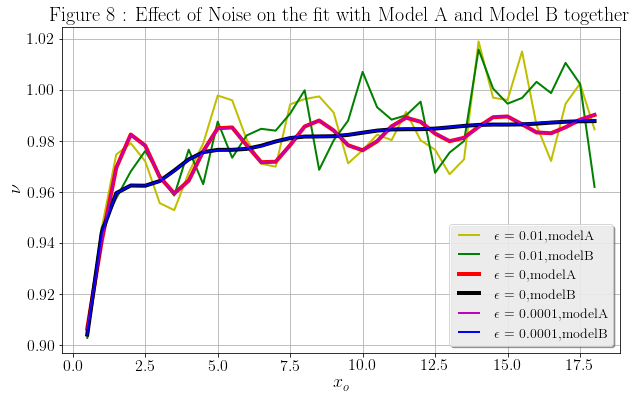

In [22]:
#Plotting fit for 'v' by varying noise level
fig8 = figure()
ax8 = fig8.add_subplot(111)
ax8.plot(x0,v_modelA1,'y',label="$\epsilon$ = 0.01,modelA")
ax8.plot(x0,v_modelB1,'g',label="$\epsilon$ = 0.01,modelB")
ax8.plot(x0,v_modelA,'r',linewidth = 4,label="$\epsilon$ = 0,modelA")
ax8.plot(x0,v_modelB,'k',linewidth = 4,label="$\epsilon$ = 0,modelB")
ax8.plot(x0,v_modelA3,'m',label="$\epsilon$ = 0.0001,modelA")
ax8.plot(x0,v_modelB3,'b',label="$\epsilon$ = 0.0001,modelB")
ax8.legend()

title(r"Figure 8 : Effect of Noise on the fit with Model A and Model B together ")
xlabel("$x_{o}$")
ylabel(r"$\nu$")
grid()
savefig("Figure8.jpg")

### Results and Discussion : 
* As we observe figure 6,7,8 that the effect of noise make the fit more oscillatory compared to without noise case at large x0 which is understandable since when we add noise to data with less no
 of points(sample size here we gave 41) the effect of it is higher at large x0 since there will be lesser
    no of points after x0 that we use it for fitting the model, so effect of noise is higher for less data
    size whose derivation comes using **Maximum Likelihood and CLT theorems in Probability**,but intuitively we see that when more data is there effect of noise is less since noise follows a **Gaussian
    distribution** its average value is zero which is valid only when no of points is large since Central
    limit Theorem is valid only for large no of random variables i.e noise in this case,So when more no
    of points are there it follows a Standard Normal distribution according to CLT which has Mean =
    0,So overall effect of noise is lesser so that model fits approximately well. Whereas in case of less
    no of points the effect of noise is higher at large x0.
* And the effect of noise is lesser for small values of $x_0$ because there'll be more x values greater than $x_0$ comparitively than large $x_0$ so the effect is lesser.
* Also we see that varying $\epsilon$ also affects the quality of fit,from observation more the $\epsilon$ more the variations we get!
* And as we seen in part F that when we increase the no of points the effect of noise comparatively lesser at large $x_0$ since we'll have more $x$ values greater than $x_0$, so we get to more data to fit.So it reduces the effect of noise as we observe the plots
* So for both Model A and B the addition of noise reduces the quality of the fit significantly at large values of $x_0$